#### from collections import defaultdict, Counter
from scipy.stats import norm
import elotl.corpus
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import statsmodels.api as sm
import os
from re import sub
import graficas as ga
import itertools
import networkit as nk

#### G = nk.readGraph(os.path.join("networks","full_concurrency_nahuatl-nahuatl.graphml"),nk.Format.GraphML)
G = nk.graphtools.toUndirected(G)
G.removeSelfLoops()

In [9]:
print("Nodes: ",end="")
print(G.numberOfNodes())
print("Edges: ",end="")
print(G.numberOfEdges())

Nodes: 29675
Edges: 182161


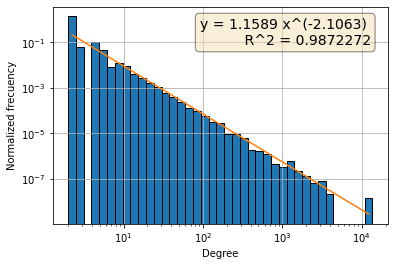

In [17]:
degs = sorted(nk.centrality.DegreeCentrality(G).run().scores())
plt.plot(figsize=(12,8))
ga.plotDistribution(degs,plt.gca(),bins=40)
plt.xlabel("Degree")
plt.show()

In [18]:
stat = nk.centrality.LocalClusteringCoefficient(G)
stat = stat.run()

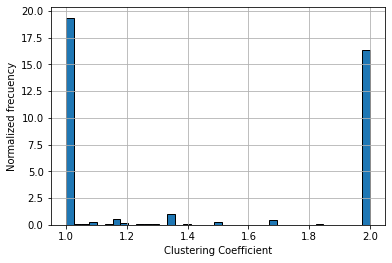

In [19]:
plt.figure(figsize=(6,4))
ga.plotDistribution(stat.scores(),plt.gca(),bins=40,log=False,norm=True)
plt.xlabel("Clustering Coefficient")
plt.show()

In [20]:
stat = nk.centrality.Closeness(G,True,nk.centrality.ClosenessVariant.Standard)
stat = stat.run()

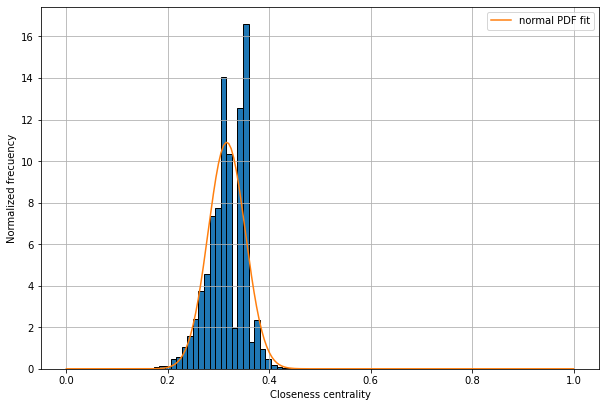

In [21]:
plt.figure(figsize=(10,6.66))
ga.plotDistribution(stat.scores(),plt.gca(),bins=40,log=False,norm=True)
mu = np.mean(stat.scores())
sigma = np.std(stat.scores())
xs = np.linspace(0,1,201)
ys = [norm.pdf(x,mu,sigma) for x in xs]
plt.plot(xs,ys,label="normal PDF fit")
plt.legend(loc="upper right")
plt.xlabel("Closeness centrality")
plt.show()

In [9]:
stat = nk.centrality.ApproxBetweenness(G,epsilon=0.1)
stat = stat.run()

ValueError: `bins` must increase monotonically, when an array

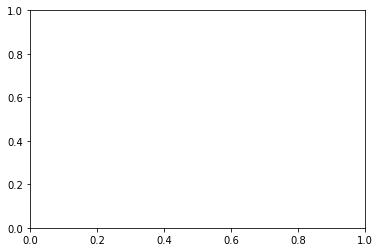

In [10]:
plt.figure(figsize=(6,4))
ga.plotDistribution(stat.scores(),plt.gca(),bins=40,log=False,norm=True)
mu = np.mean(stat.scores())
sigma = np.std(stat.scores())
xs = np.linspace(0,1,201)
ys = [norm.pdf(x,mu,sigma) for x in xs]
plt.plot(xs,ys,label="normal PDF fit")
plt.legend(loc="upper right")
plt.xlabel("Betweenness centrality")
plt.show()

In [19]:
plmCommunities = nk.community.detectCommunities(G)
nk.community.writeCommunities(plmCommunities,os.path.join("networks","full_concurrency_español_louvainPartition.txt"))

PLM(balanced,pc,turbo) detected communities in 0.09574675559997559 [s]
solution properties:
-------------------  -----------
# communities          15
min community size     17
max community size   5116
avg. community size  1978.33
modularity              0.254488
-------------------  -----------
wrote communities to: networks/full_concurrency_español_louvainPartition.txt


In [18]:
plpCommunities = nk.community.detectCommunities(G, algo=nk.community.PLP(G))
nk.community.writeCommunities(plpCommunities,os.path.join("networks","full_concurrency_español_plpPartition.txt"))

PLP detected communities in 0.02508711814880371 [s]
solution properties:
-------------------  --------------
# communities          171
min community size       2
max community size   28935
avg. community size    173.538
modularity               0.00499313
-------------------  --------------
wrote communities to: networks/full_concurrency_español_plpPartition.txt
